In [1]:
import os
import re
import glob
import numpy as np
import pandas as pd
from scipy import io
from mne import viz, stats
from matplotlib import colors, pyplot as plt

In [2]:
CAF_DOSE = 200
SIGNIFICANT_P = 0.05

STAGE = 'REM'

PROJECT_PATH = 'E:\\Cafeine_data'
FEATURE_PATH = 'C:\\Users\\Philipp\\Documents\\Caffeine\\Features{dose}'.format(dose=CAF_DOSE)
SUBJECTS_PATH = 'E:\\Cafeine_data\\CAF_{dose}_Inventaire.csv'.format(dose=CAF_DOSE)

BANDS = ['delta', 'theta', 'alpha', 'sigma', 'beta', 'low gamma']

In [3]:
sensor_pos = io.loadmat(os.path.join(PROJECT_PATH, 'Coo_caf'))['Cor'].T
sensor_pos = np.array([sensor_pos[1], sensor_pos[0]]).T

In [4]:
subjects = pd.read_csv(SUBJECTS_PATH, index_col=0)[['Subject_id', 'CAF']]

if CAF_DOSE == 200:
    subjects['CAF'] = (subjects['CAF'] == 'Y').values.astype(np.int)
elif CAF_DOSE == 400:
    subjects['CAF'] = (subjects['CAF'] == 1).values.astype(np.int)

In [5]:
feature_names = list(BANDS)
feature_names += [band + '_clean' for band in BANDS]

In [6]:
data_plac = {}
data_caff = {}

dropped = []

for i, recording_id in subjects.iterrows():
    recording_id = recording_id[0]
    subject_id = re.match('\S\d+', recording_id)[0]
    
    if subject_id in dropped:
        continue
    
    path_stage = os.path.join(FEATURE_PATH, recording_id, 'PSD', f'PSD_{STAGE}.npy')
    stage = np.load(path_stage).mean(axis=1)
    stage = (stage - stage.mean(axis=0)) / stage.std(axis=0)
    
    path_stage_clean = os.path.join(FEATURE_PATH, recording_id, 'PSD', f'PSD_C{STAGE}.npy')
    if not os.path.exists(path_stage_clean):
        print(f'Dropping subject {subject_id}, no cleaned data found')
        dropped.append(subject_id)
        if subject_id in data_caff:
            del data_caff[subject_id]
        if subject_id in data_plac:
            del data_plac[subject_id]
        continue
        
    stage_clean = np.load(path_stage_clean).mean(axis=1)
    stage_clean = (stage_clean - stage_clean.mean(axis=0)) / stage_clean.std(axis=0)
    
    current = np.concatenate((stage, stage_clean), axis=1)
    
    if subjects['CAF'][i]:
        data_caff[subject_id] = current
    else:
        data_plac[subject_id] = current

In [7]:
diff = {}
results = {}
for i, feature in enumerate(feature_names):
    diff[feature] = []
    for subject_id in data_plac.keys():
        diff[feature].append(data_caff[subject_id][:,i] - data_plac[subject_id][:,i])
    diff[feature] = np.array(diff[feature])

    results[feature] = stats.permutation_t_test(diff[feature],
                                                n_permutations=1000,
                                                tail=0,
                                                n_jobs=-1)

Permuting 999 times...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    2.3s remaining:    3.9s


Permuting 999 times...
Permuting 999 times...


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    3.1s remaining:    1.8s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.1s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s


Permuting 999 times...
Permuting 999 times...


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


Permuting 999 times...
Permuting 999 times...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


Permuting 999 times...
Permuting 999 times...
Permuting 999 times...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


Permuting 999 times...
Permuting 999 times...


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


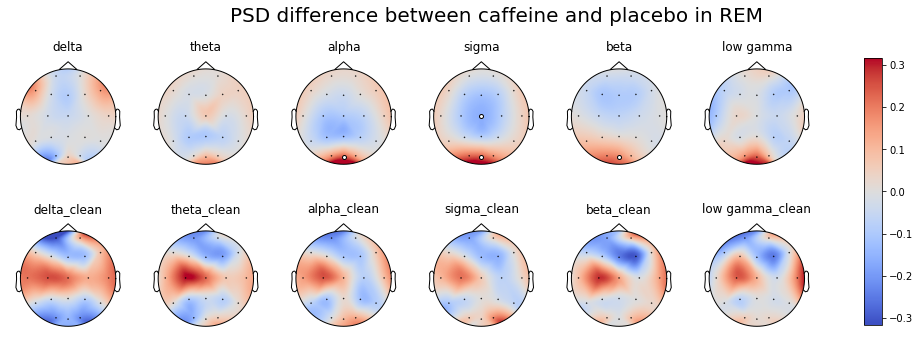

In [8]:
colormap = 'coolwarm'

plt.figure(figsize=(18, 5))
plt.suptitle(f'PSD difference between caffeine and placebo in {STAGE}', y=1.05, fontsize=20)

vmin = np.min([np.min(diff[feature].mean(axis=0)) for feature in feature_names])
vmax = np.max([np.max(diff[feature].mean(axis=0)) for feature in feature_names])
highest = np.max([np.max(np.abs(diff[feature].mean(axis=0))) for feature in feature_names])
vmin = -highest
vmax = highest

subplot_index = 1
axes = []
for feature in feature_names:
    curr_sig = results[feature][1]
    curr_diff = diff[feature].mean(axis=0)

    axes.append(plt.subplot(2, 6, subplot_index))
    plt.title(feature)
    mask = curr_sig < SIGNIFICANT_P
    viz.plot_topomap(curr_diff, sensor_pos, mask=mask, cmap=colormap, vmin=vmin, vmax=vmax, contours=False, show=False)
    subplot_index += 1
    
norm = colors.Normalize(vmin=vmin,vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=axes, shrink=0.9, aspect=15)
plt.show()